In [556]:
import pandas as pd
import numpy as np
import seaborn.objects as so
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors
from statistics import mode

## Preprocesamiento

1)

In [507]:
df = pd.read_csv('FBRef2020-21.csv')

2)

In [508]:
df = df[df['Min'] >= 500]

3)

In [509]:
df = df.dropna(axis=1, thresh=len(df) - 100)
df = df.dropna()

4)

In [510]:
df = df.reset_index()

5)

In [511]:
indice_ast = df.columns.get_loc('Ast/90')

data_num = df.iloc[:,indice_ast:]

data_num

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,0.15,-0.06,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,0.00,0.04,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,0.00,-0.09,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,0.00,0.02,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.00,-0.03,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,0.00,0.14,0.14,0.00,0.09,0.09,1.11,0.14,0.00,0.06,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1898,0.19,0.19,0.39,0.11,0.22,0.33,2.13,0.84,0.00,-0.03,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1899,0.17,0.14,0.31,0.18,0.11,0.28,1.03,0.41,0.03,0.03,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1900,0.21,0.21,0.42,0.14,0.12,0.26,1.47,0.63,0.07,0.09,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


#### 6

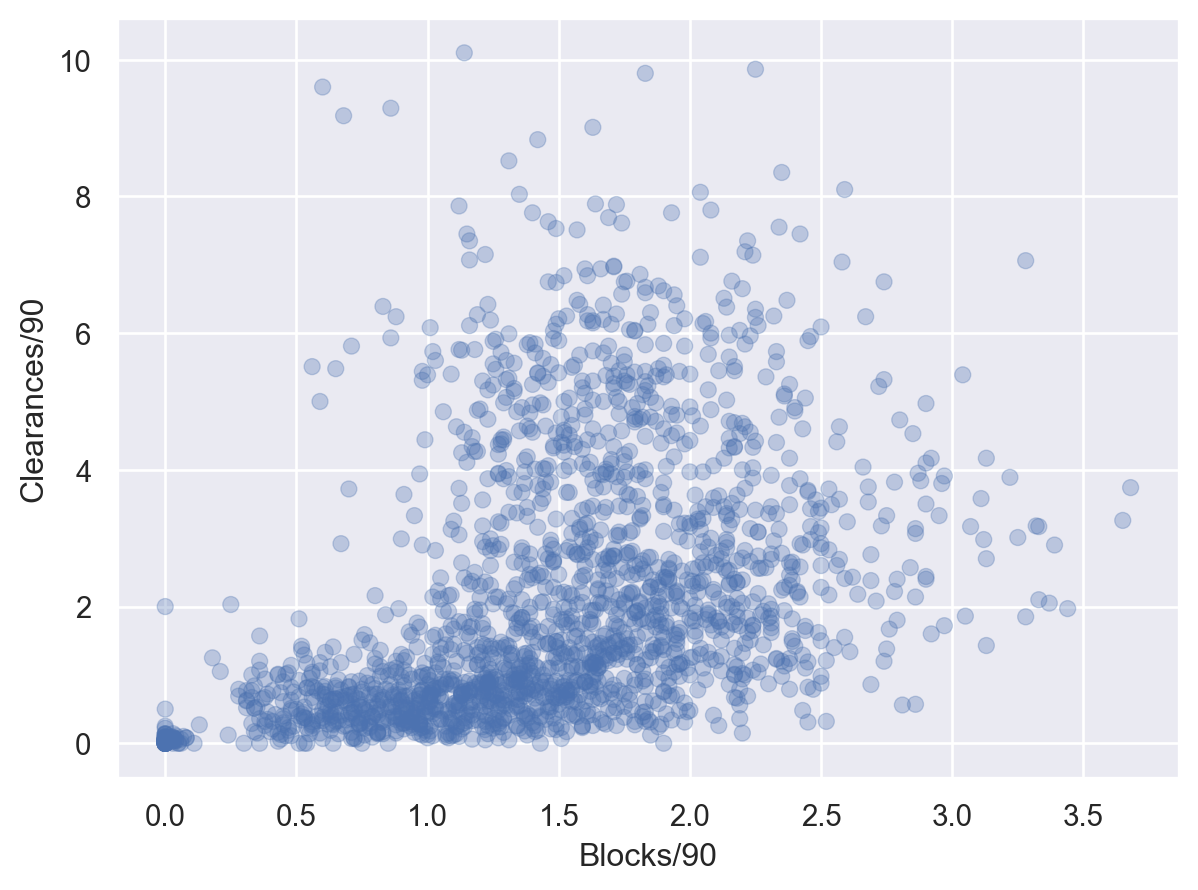

In [512]:
(
    so.Plot(
            x = data_num['Blocks/90'],
            y = data_num['Clearances/90'],

    )
    .add(so.Dot(alpha='0.3'))

)    



In [513]:


data_num_M = data_num.to_numpy()

X = StandardScaler().fit_transform(data_num_M)

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)


[0.28561673 0.20587363]
[245.56053433 208.48129964]


In [514]:
Z = X @ pca.components_.T
pca.components_

array([[ 0.0978309 ,  0.12235278,  0.13646434,  0.11786872,  0.13998799,
         0.15257913,  0.14846314,  0.14481143,  0.04804912,  0.00388841,
        -0.11217634, -0.10807911, -0.09704054, -0.1387503 , -0.14075163,
        -0.0220899 , -0.0066418 , -0.11890092, -0.13395788, -0.12904192,
        -0.1286844 , -0.13709736, -0.12861211, -0.05639394,  0.11292689,
        -0.06678811,  0.08581937,  0.04163036, -0.02132407, -0.1028429 ,
        -0.04243525, -0.10213642,  0.05971853,  0.04562776, -0.05339398,
         0.06916766, -0.09606843, -0.00891837, -0.08881047, -0.02561192,
        -0.06728966, -0.06357359, -0.02772924, -0.01949978,  0.00689255,
        -0.05675786,  0.03777891,  0.07871694,  0.12795614,  0.11575816,
         0.04020264,  0.11591618,  0.10584863,  0.1143932 ,  0.05119275,
         0.11975998,  0.10027436,  0.02938621,  0.07500306,  0.0624046 ,
         0.07322235,  0.03548802, -0.04215959, -0.03407107, -0.08399991,
        -0.0121418 ,  0.07797901, -0.05615928, -0.0

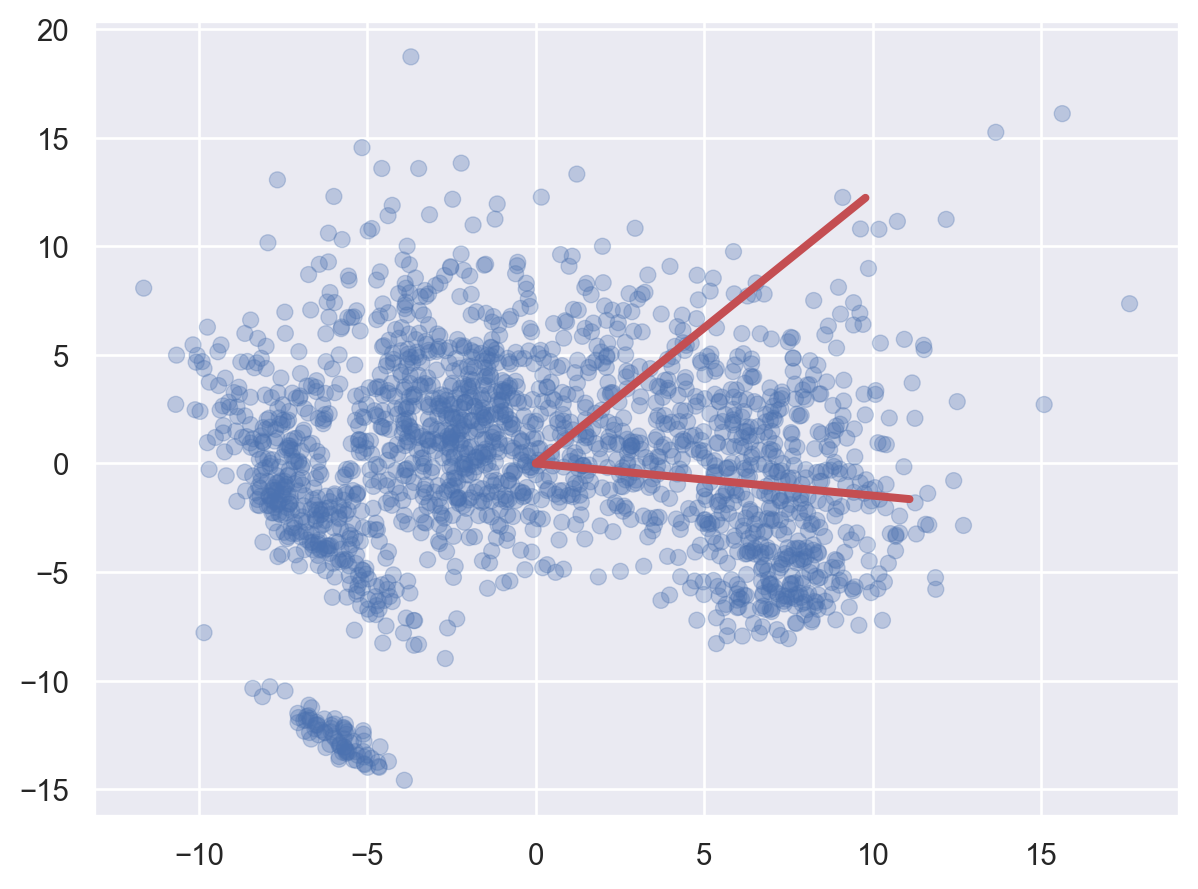

In [515]:
(
    so.Plot(

    )
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.0978309*100], y = [0, 0.12235278*100])
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.07393905*150], y = [0, -0.01093821*150])
    .add(so.Dot(alpha = '0.3'), x = Z[:, 0], y = Z[:,1])
)

In [516]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(Z)

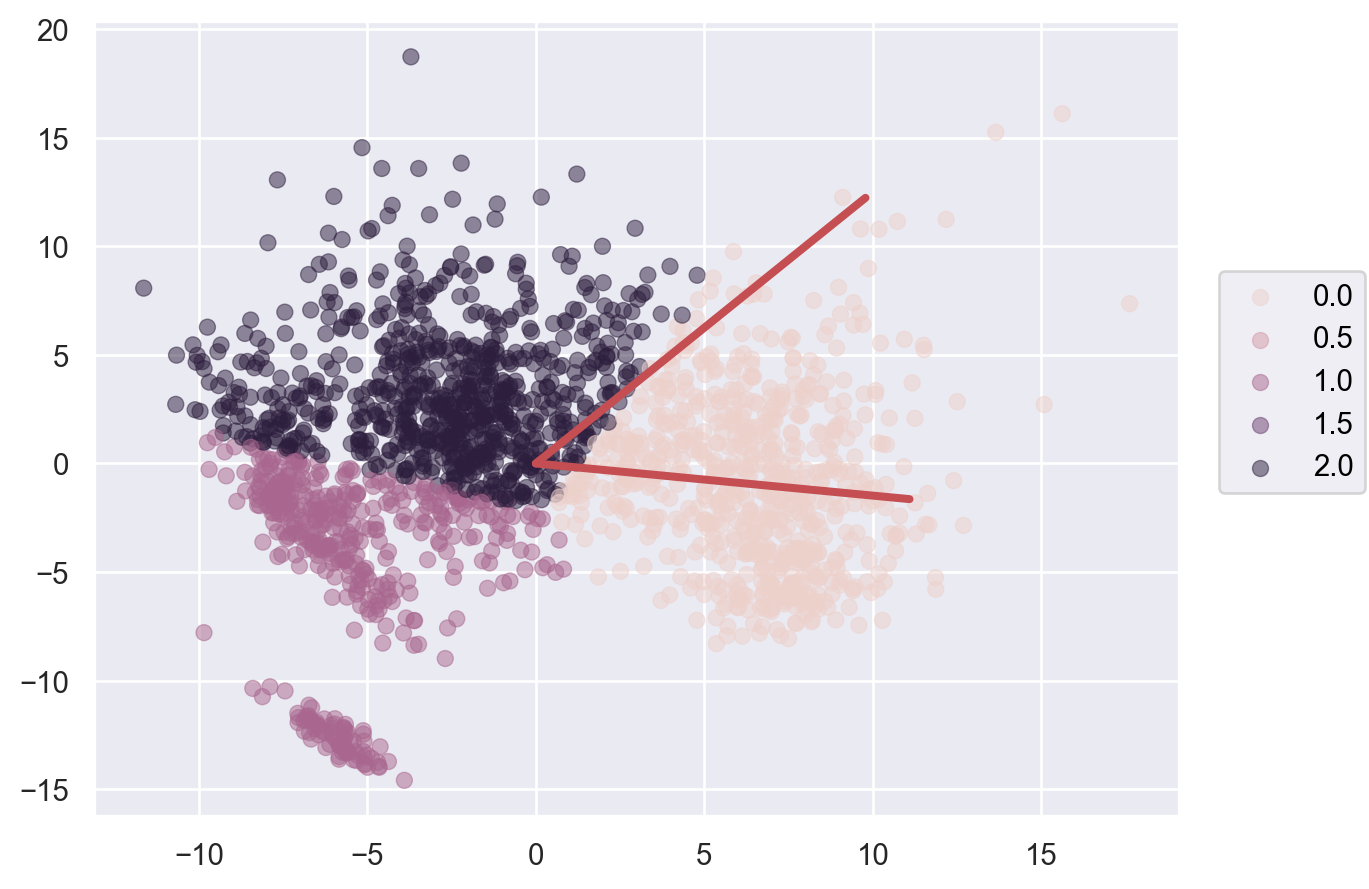

In [517]:
(
    so.Plot()
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.0978309*100], y = [0, 0.12235278*100])
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.07393905*150], y = [0, -0.01093821*150])
    .add(so.Dot(alpha = 0.5), x = Z[:, 0], y = Z[:, 1], color = kmeans.labels_)
)

In [518]:
dbscan = DBSCAN(eps=3, min_samples=5).fit(Z)
dbscan_label = dbscan.labels_.astype(str)

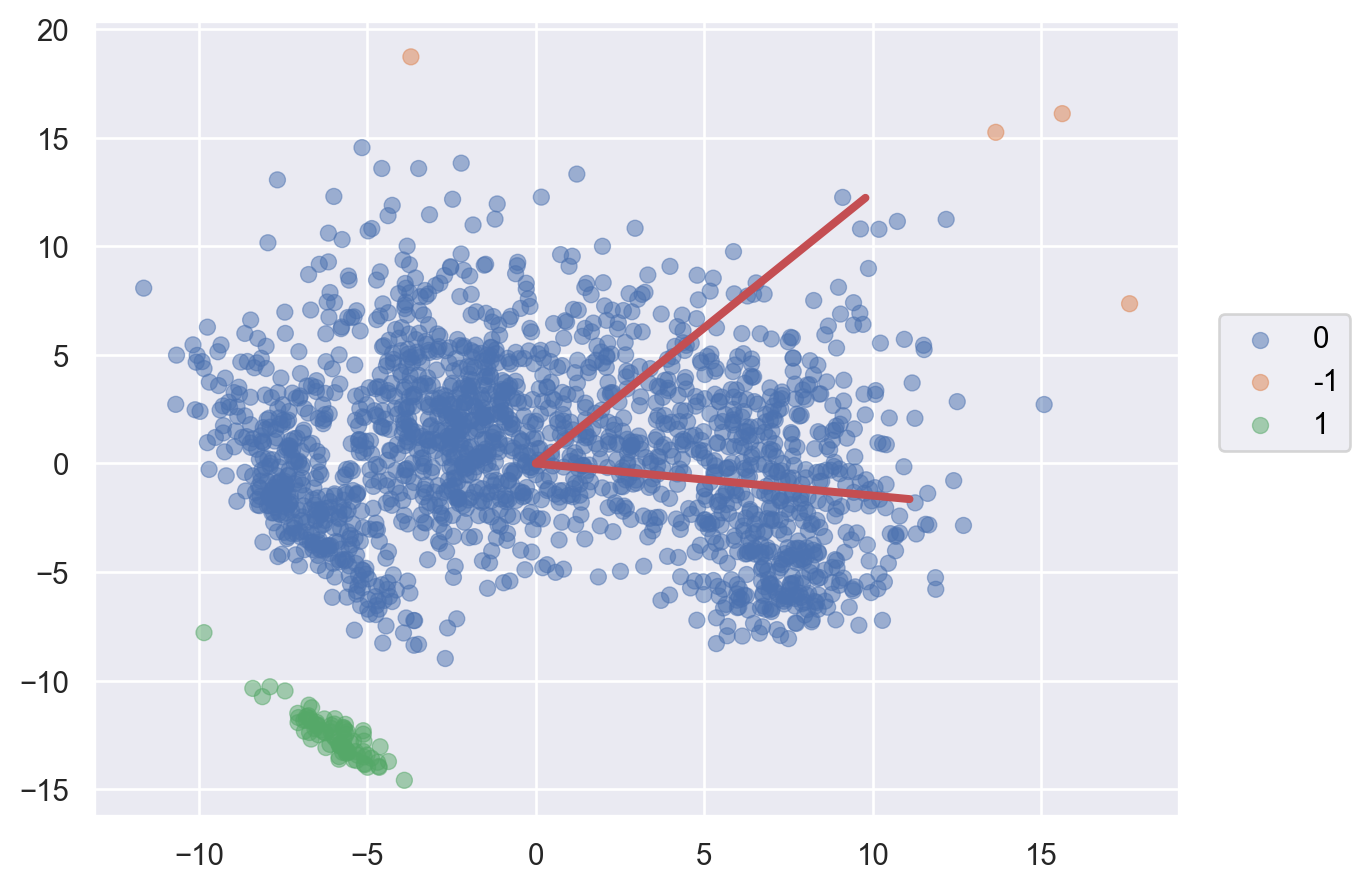

In [519]:
(
    so.Plot()
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.0978309*100], y = [0, 0.12235278*100])
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.07393905*150], y = [0, -0.01093821*150])
    .add(so.Dot(alpha= 0.5), x = Z[:, 0], y = Z[:, 1], color = dbscan_label)
)

In [520]:
dbscan_orig = DBSCAN(eps=90, min_samples=5).fit(data_num)
dbscan_orig.labels_
dbscan_orig_label = dbscan_orig.labels_.astype(str)

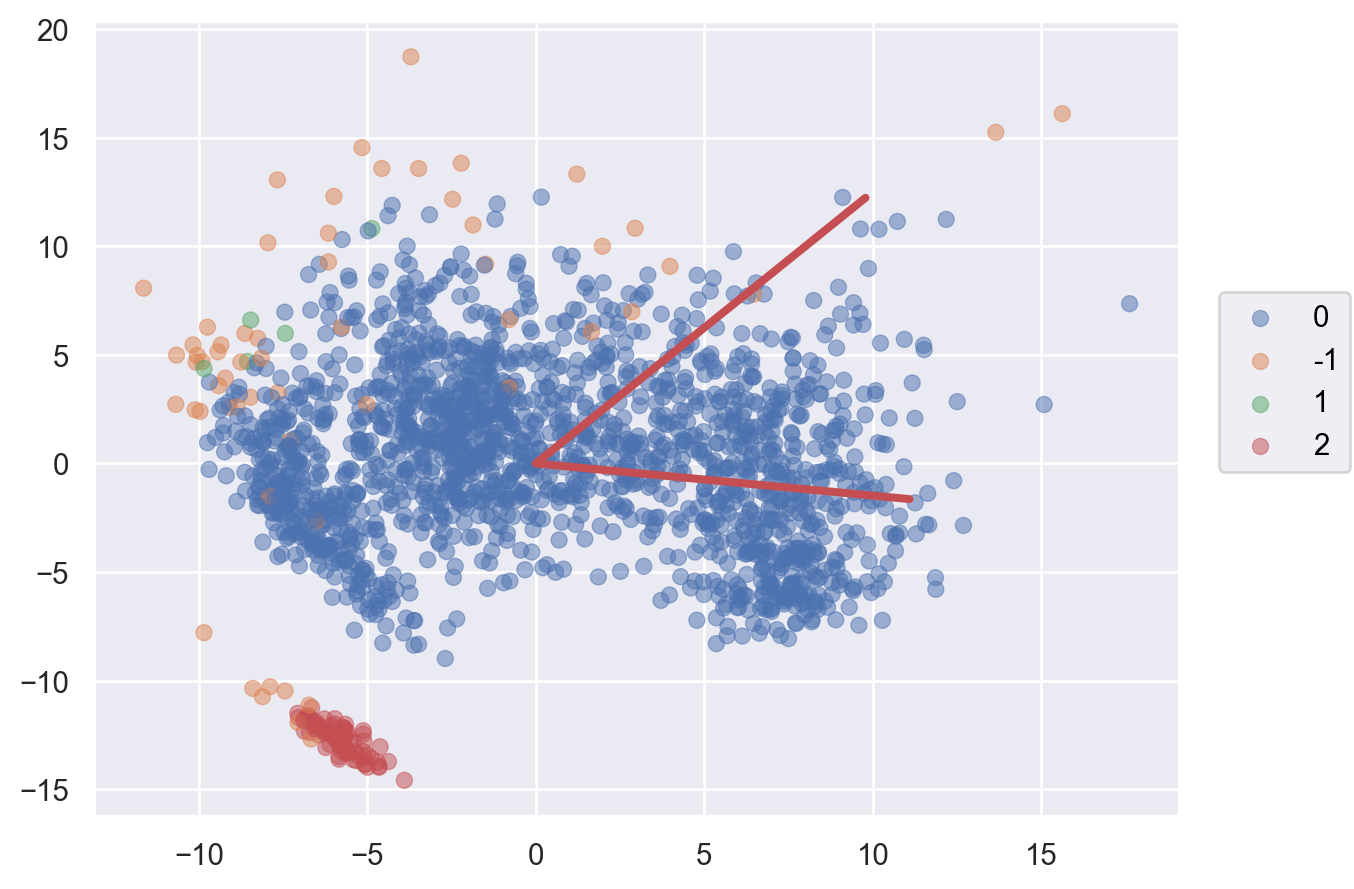

In [521]:
(
    so.Plot()
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.0978309*100], y = [0, 0.12235278*100])
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.07393905*150], y = [0, -0.01093821*150])
    .add(so.Dot(alpha= 0.5), x = Z[:, 0], y = Z[:, 1], color = dbscan_orig_label)
)

In [522]:
pos = pd.DataFrame(Z)
pos.insert(0, 'Pos', df['Pos'])
pos['label'] = dbscan_label
pos_1 = pos[pos['label'] == '1']
pos_0 = pos[pos['label'] == '0']
print('Cluster 0 (grande del medio):', pos_0['Pos'].unique())
print('Cluster 1 (abajo a la izquierda):', pos_1['Pos'].unique())

Cluster 0 (grande del medio): ['DF' 'DF,FW' 'DF,MF' 'FW' 'FW,DF' 'FW,MF' 'MF' 'MF,DF' 'MF,FW']
Cluster 1 (abajo a la izquierda): ['GK']


#### 7


In [523]:
df['Pos_filt'] = df['Pos'].str.split(',').str[0]

In [524]:
data_clasif = data_num
data_clasif.insert(0, 'Pos_filt', df['Pos_filt'])

In [525]:
data_clasif_y = data_clasif['Pos_filt']
data_clasif_X = data_clasif.drop('Pos_filt', axis=1)

In [565]:
X_train, X_test, y_train, y_test = train_test_split(data_clasif_X, data_clasif_y, test_size=0.2, random_state=33)

In [566]:
precision = []
for num in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = num)
    pre = cross_val_score(knn, X_train, y_train, cv = 20)
    precision.append(pre.mean()*100)

In [567]:
k = np.argmax(precision) + 1
print(k, np.max(precision))

6 83.95505809979494


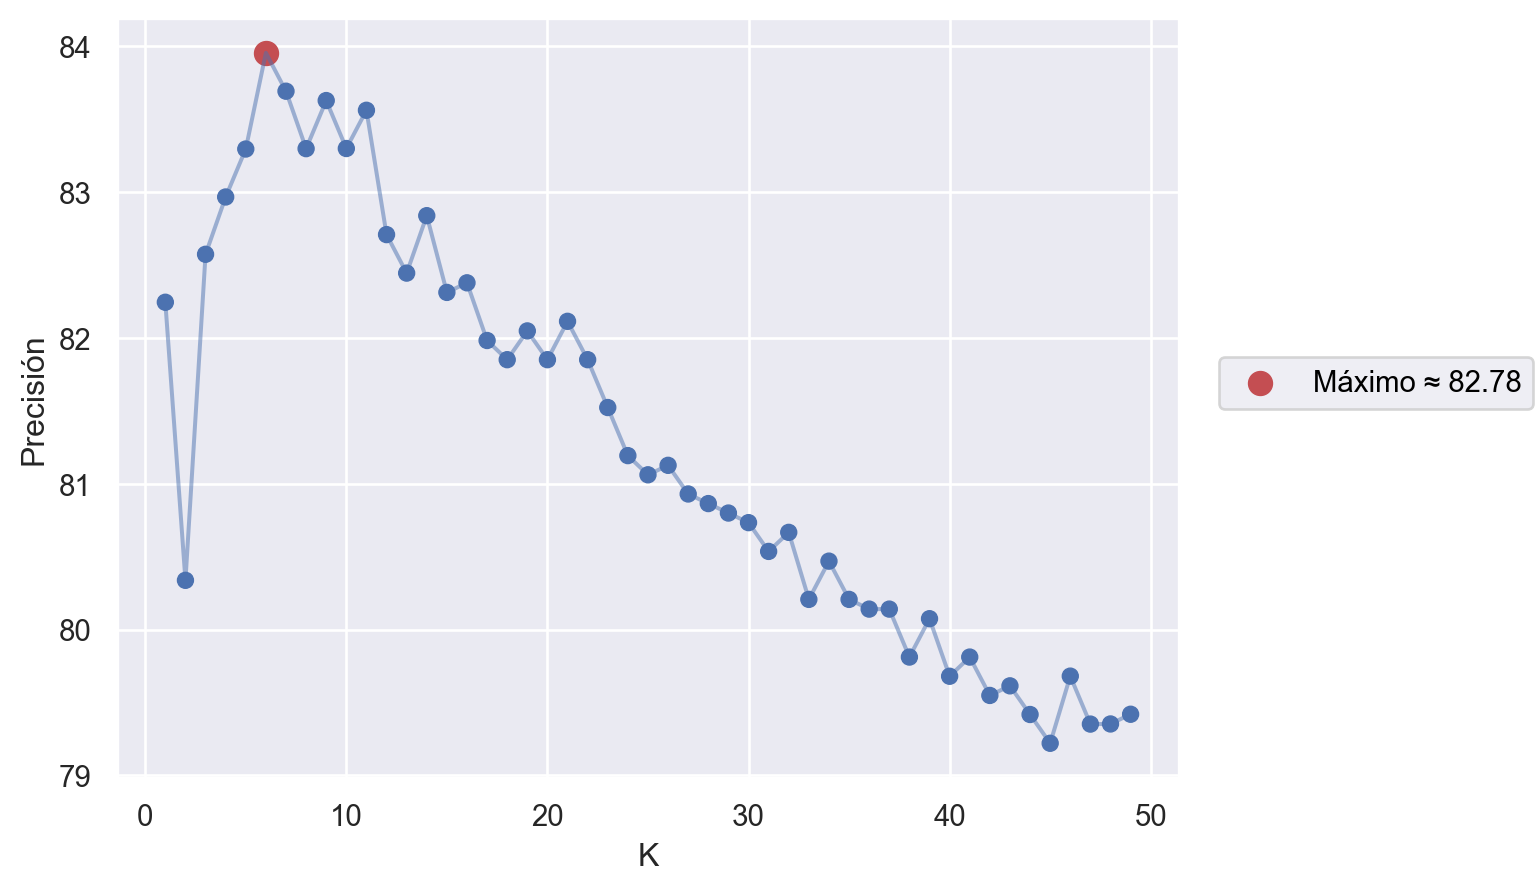

In [568]:
(
    so.Plot()
    .add(so.Line(alpha= 0.5), x = range(1,50), y = precision)
    .add(so.Dot(), x = range(1,50), y = precision)
    .add(so.Dot(color = 'r', pointsize= 9), x = [k], y = [precision[k-1]], label= 'Máximo ≈ 82.78')
    .label(x = 'K', y = 'Precisión')
)

In [594]:
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_train)

NearestNeighbors(n_neighbors=6)

In [600]:
posiciones = y_train

X_test.index
aciertos = 0
for ind in X_test.index:
    distancias, indices = neighbors.kneighbors(X_test.loc[[ind]])
    votos = posiciones.iloc[indices.flatten()]
    if mode(votos) == data_clasif.iloc[ind]['Pos_filt']:
        aciertos +=1

pc_aciertos = (aciertos / X_test.index.shape[0])*100

print('Porcentaje de aciertos: ', np.round(pc_aciertos, 2), '%')

Porcentaje de aciertos:  82.68 %


asdasdasads

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_clasif_X, data_clasif_y, test_size=0.2, random_state=33)

In [ ]:
precision = []
for num in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = num)
    pre = cross_val_score(knn, X_train, y_train, cv = 20)
    precision.append(pre.mean()*100)

In [ ]:
k = np.argmax(precision) + 1
print(k, np.max(precision))

In [ ]:
(
    so.Plot()
    .add(so.Line(alpha= 0.5), x = range(1,50), y = precision)
    .add(so.Dot(), x = range(1,50), y = precision)
    .add(so.Dot(color = 'r', pointsize= 9), x = [k], y = [precision[k-1]], label= 'Máximo ≈ 82.78')
    .label(x = 'K', y = 'Precisión')
)

In [ ]:
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_train)

In [ ]:
posiciones = y_train

X_test.index
aciertos = 0
for ind in X_test.index:
    distancias, indices = neighbors.kneighbors(X_test.loc[[ind]])
    votos = posiciones.iloc[indices.flatten()]
    if mode(votos) == data_clasif.iloc[ind]['Pos_filt']:
        aciertos +=1

pc_aciertos = (aciertos / X_test.index.shape[0])*100

print('Porcentaje de aciertos: ', np.round(pc_aciertos, 2), '%')